<a href="https://colab.research.google.com/github/Melisa7L/PPS/blob/main/Nube_palabras_PPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!pip install spacy


In [6]:
!pip install click

In [9]:
!pip install --upgrade click


In [10]:
!python -m spacy download es_core_news_sm

2023-11-08 12:09:57.582225: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 12:09:57.582299: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 12:09:57.582347: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 12:09:57.596939: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-08 12:10:00.163297: W tensorflow/compiler/

In [ ]:
!python -m spacy download es_core_news_sm

2023-11-08 02:39:04.420033: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 02:39:04.420098: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 02:39:04.420132: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 02:39:04.429227: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-08 02:39:05.679081: W tensorflow/compiler/

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**PRUEBAS DE SOLO 100 REGISTROS PARA EL AREA DE SALUD PARA VER QUE SI FUNCIONA EL CODIGO**

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


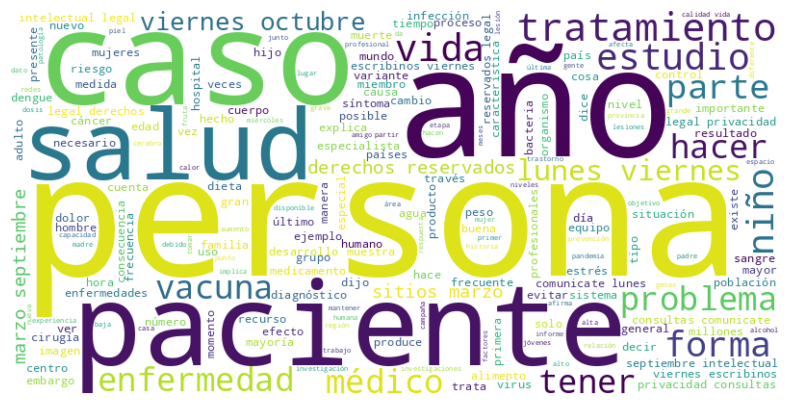

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords

# Lee el archivo XLSX que ya se limpió
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo.xlsx"

# Se carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta)

# Filtra las filas que pertenecen a la categoría 'salud'
df_salud = df[df['categoria'] == 'salud']

# Selecciona aleatoriamente 1000 registros del DataFrame
df_sample = df_salud.sample(n=100, random_state=42)  # Puedes ajustar la semilla aleatoria (random_state) según sea necesario

# Analiza la columna de texto_noticia para la categoría 'salud'
text = ' '.join(df_sample['texto_noticia'].astype(str))  # Convierte la columna a texto y lo une en una sola cadena

# Resto del código (procesamiento de texto, generación de nube de palabras, etc.) va aquí
# Limpia el texto eliminando símbolos y caracteres no deseados
text = re.sub(r'[^\w\s]', '', text)

# Inicializa spaCy con el modelo en español
nlp = spacy.load('es_core_news_sm')

# Aumenta el valor de nlp.max_length para permitir textos más largos
nlp.max_length = len(text) + 100000  # Añade un margen de 100,000 caracteres

# Procesa el texto con spaCy
doc = nlp(text)

# Filtra sinónimos, adjetivos y verbos y excluye los stopwords utilizando NLTK
filtered_words = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.text.lower() not in stopwords.words('spanish')]

# Convierte las palabras filtradas en una cadena nuevamente
filtered_text = ' '.join(filtered_words)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Guarda la nube de palabras en un archivo
wordcloud.to_file('nube_de_palabras_seccion.png')

# Contar la frecuencia de las palabras utilizando un diccionario
word_freq = Counter(filtered_words)

# Guarda las palabras más frecuentes en un archivo de texto con codificación UTF-8
with open('palabras_mas_frecuentes_salud.txt', 'w', encoding='utf-8') as file:
    for word, freq in word_freq.most_common():
        file.write(f"{word}: {freq}\n")

**CODIGO COMPLETO PARA CREAR LA NUBE DE PALABRAS Y EL TXT CON LAS PALABRAS FRECUENTES EL AREA DE SALUD**

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords

# Lee el archivo XLSX que ya se limpió
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo.xlsx"

# Se carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta)
# Filtra las filas que pertenecen a la categoría 'salud'
df_salud = df[df['categoria'] == 'salud']

# Analiza la columna de texto_noticia para la categoría 'salud'
text = ' '.join(df_salud['texto_noticia'].astype(str))  # Convierte la columna a texto y lo une en una sola cadena

# Limpia el texto eliminando símbolos y caracteres no deseados
text = re.sub(r'[^\w\s]', '', text)

# Inicializa spaCy con el modelo en español
nlp = spacy.load('es_core_news_sm')

# Aumenta el valor de nlp.max_length para permitir textos más largos
nlp.max_length = len(text) + 100000  # Añade un margen de 100,000 caracteres

# Procesa el texto con spaCy
doc = nlp(text)

# Filtra sinónimos, adjetivos y verbos y excluye los stopwords utilizando NLTK
filtered_words = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.text.lower() not in stopwords.words('spanish')]

# Convierte las palabras filtradas en una cadena nuevamente
filtered_text = ' '.join(filtered_words)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Guarda la nube de palabras en un archivo
wordcloud.to_file('nube_de_palabras_salud.png')

# Contar la frecuencia de las palabras utilizando un diccionario
word_freq = Counter(filtered_words)

# Guarda las palabras más frecuentes en un archivo de texto con codificación UTF-8
with open('palabras_mas_frecuentes_salud.txt', 'w', encoding='utf-8') as file:
    for word, freq in word_freq.most_common():
        file.write(f"{word}: {freq}\n")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


**CODIGO COMPLETO PARA CREAR LA NUBE DE PALABRAS Y EL TXT CON LAS PALABRAS FRECUENTES EL AREA DE ECONOMIA**



In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords

# Lee el archivo XLSX que ya se limpió
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo.xlsx"

# Se carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta)
# Filtra las filas que pertenecen a la categoría 'salud'
df_salud = df[df['categoria'] == 'economia']

# Analiza la columna de texto_noticia para la categoría 'salud'
text = ' '.join(df_salud['texto_noticia'].astype(str))  # Convierte la columna a texto y lo une en una sola cadena

# Limpia el texto eliminando símbolos y caracteres no deseados
text = re.sub(r'[^\w\s]', '', text)

# Inicializa spaCy con el modelo en español
nlp = spacy.load('es_core_news_sm')

# Aumenta el valor de nlp.max_length para permitir textos más largos
nlp.max_length = len(text) + 100000  # Añade un margen de 100,000 caracteres

# Procesa el texto con spaCy
doc = nlp(text)

# Filtra sinónimos, adjetivos y verbos y excluye los stopwords utilizando NLTK
filtered_words = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.text.lower() not in stopwords.words('spanish')]

# Convierte las palabras filtradas en una cadena nuevamente
filtered_text = ' '.join(filtered_words)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Guarda la nube de palabras en un archivo
wordcloud.to_file('nube_de_palabras_economia.png')

# Contar la frecuencia de las palabras utilizando un diccionario
word_freq = Counter(filtered_words)

# Guarda las palabras más frecuentes en un archivo de texto con codificación UTF-8
with open('palabras_mas_frecuentes_economia.txt', 'w', encoding='utf-8') as file:
    for word, freq in word_freq.most_common():
        file.write(f"{word}: {freq}\n")


**CODIGO COMPLETO PARA CREAR LA NUBE DE PALABRAS Y EL TXT CON LAS PALABRAS FRECUENTES EL AREA DE EDUCACION**


In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords

# Lee el archivo XLSX que ya se limpió
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo.xlsx"

# Se carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta)
# Filtra las filas que pertenecen a la categoría 'salud'
df_salud = df[df['categoria'] == 'educacion']

# Analiza la columna de texto_noticia para la categoría 'salud'
text = ' '.join(df_salud['texto_noticia'].astype(str))  # Convierte la columna a texto y lo une en una sola cadena

# Limpia el texto eliminando símbolos y caracteres no deseados
text = re.sub(r'[^\w\s]', '', text)

# Inicializa spaCy con el modelo en español
nlp = spacy.load('es_core_news_sm')

# Aumenta el valor de nlp.max_length para permitir textos más largos
nlp.max_length = len(text) + 100000  # Añade un margen de 100,000 caracteres

# Procesa el texto con spaCy
doc = nlp(text)

# Filtra sinónimos, adjetivos y verbos y excluye los stopwords utilizando NLTK
filtered_words = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.text.lower() not in stopwords.words('spanish')]

# Convierte las palabras filtradas en una cadena nuevamente
filtered_text = ' '.join(filtered_words)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Guarda la nube de palabras en un archivo
wordcloud.to_file('nube_de_palabras_educacion.png')

# Contar la frecuencia de las palabras utilizando un diccionario
word_freq = Counter(filtered_words)

# Guarda las palabras más frecuentes en un archivo de texto con codificación UTF-8
with open('palabras_mas_frecuentes_educacion.txt', 'w', encoding='utf-8') as file:
    for word, freq in word_freq.most_common():
        file.write(f"{word}: {freq}\n")


**CODIGO COMPLETO PARA CREAR LA NUBE DE PALABRAS Y EL TXT CON LAS PALABRAS FRECUENTES EL AREA DE CIENCIA**

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords

# Lee el archivo XLSX que ya se limpió
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo.xlsx"

# Se carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta)
# Filtra las filas que pertenecen a la categoría 'salud'
df_salud = df[df['categoria'] == 'ciencia_tecnologia']

# Analiza la columna de texto_noticia para la categoría 'salud'
text = ' '.join(df_salud['texto_noticia'].astype(str))  # Convierte la columna a texto y lo une en una sola cadena

# Limpia el texto eliminando símbolos y caracteres no deseados
text = re.sub(r'[^\w\s]', '', text)

# Inicializa spaCy con el modelo en español
nlp = spacy.load('es_core_news_sm')

# Aumenta el valor de nlp.max_length para permitir textos más largos
nlp.max_length = len(text) + 100000  # Añade un margen de 100,000 caracteres

# Procesa el texto con spaCy
doc = nlp(text)

# Filtra sinónimos, adjetivos y verbos y excluye los stopwords utilizando NLTK
filtered_words = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.text.lower() not in stopwords.words('spanish')]

# Convierte las palabras filtradas en una cadena nuevamente
filtered_text = ' '.join(filtered_words)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Guarda la nube de palabras en un archivo
wordcloud.to_file('nube_de_palabras_ciencia_tecnologia.png')

# Contar la frecuencia de las palabras utilizando un diccionario
word_freq = Counter(filtered_words)

# Guarda las palabras más frecuentes en un archivo de texto con codificación UTF-8
with open('palabras_mas_frecuentes_ciencia_tecnologia.txt', 'w', encoding='utf-8') as file:
    for word, freq in word_freq.most_common():
        file.write(f"{word}: {freq}\n")


**CODIGO COMPLETO PARA CREAR LA NUBE DE PALABRAS Y EL TXT CON LAS PALABRAS FRECUENTES EL AREA DE DEPORTES**

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords

# Lee el archivo XLSX que ya se limpió
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo.xlsx"

# Se carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta)
# Filtra las filas que pertenecen a la categoría 'salud'
df_salud = df[df['categoria'] == 'deportes']

# Analiza la columna de texto_noticia para la categoría 'salud'
text = ' '.join(df_salud['texto_noticia'].astype(str))  # Convierte la columna a texto y lo une en una sola cadena

# Limpia el texto eliminando símbolos y caracteres no deseados
text = re.sub(r'[^\w\s]', '', text)

# Inicializa spaCy con el modelo en español
nlp = spacy.load('es_core_news_sm')

# Aumenta el valor de nlp.max_length para permitir textos más largos
nlp.max_length = len(text) + 100000  # Añade un margen de 100,000 caracteres

# Procesa el texto con spaCy
doc = nlp(text)

# Filtra sinónimos, adjetivos y verbos y excluye los stopwords utilizando NLTK
filtered_words = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.text.lower() not in stopwords.words('spanish')]

# Convierte las palabras filtradas en una cadena nuevamente
filtered_text = ' '.join(filtered_words)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Guarda la nube de palabras en un archivo
wordcloud.to_file('nube_de_palabras_deportes.png')

# Contar la frecuencia de las palabras utilizando un diccionario
word_freq = Counter(filtered_words)

# Guarda las palabras más frecuentes en un archivo de texto con codificación UTF-8
with open('palabras_mas_frecuentes_deportes.txt', 'w', encoding='utf-8') as file:
    for word, freq in word_freq.most_common():
        file.write(f"{word}: {freq}\n")


**CODIGO COMPLETO PARA CREAR LA NUBE DE PALABRAS Y EL TXT CON LAS PALABRAS FRECUENTES EL AREA DE AMBIENTE**

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords

# Lee el archivo XLSX que ya se limpió
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo.xlsx"

# Se carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta)
# Filtra las filas que pertenecen a la categoría 'salud'
df_salud = df[df['categoria'] == 'medioambiente']

# Analiza la columna de texto_noticia para la categoría 'salud'
text = ' '.join(df_salud['texto_noticia'].astype(str))  # Convierte la columna a texto y lo une en una sola cadena

# Limpia el texto eliminando símbolos y caracteres no deseados
text = re.sub(r'[^\w\s]', '', text)

# Inicializa spaCy con el modelo en español
nlp = spacy.load('es_core_news_sm')

# Aumenta el valor de nlp.max_length para permitir textos más largos
nlp.max_length = len(text) + 100000  # Añade un margen de 100,000 caracteres

# Procesa el texto con spaCy
doc = nlp(text)

# Filtra sinónimos, adjetivos y verbos y excluye los stopwords utilizando NLTK
filtered_words = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.text.lower() not in stopwords.words('spanish')]

# Convierte las palabras filtradas en una cadena nuevamente
filtered_text = ' '.join(filtered_words)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Guarda la nube de palabras en un archivo
wordcloud.to_file('nube_de_palabras_medioambiente.png')

# Contar la frecuencia de las palabras utilizando un diccionario
word_freq = Counter(filtered_words)

# Guarda las palabras más frecuentes en un archivo de texto con codificación UTF-8
with open('palabras_mas_frecuentes_medioambiente.txt', 'w', encoding='utf-8') as file:
    for word, freq in word_freq.most_common():
        file.write(f"{word}: {freq}\n")


**CODIGO COMPLETO PARA CREAR LA NUBE DE PALABRAS Y EL TXT CON LAS PALABRAS FRECUENTES EL AREA DE HOROSCOPO**

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords

# Lee el archivo XLSX que ya se limpió
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo.xlsx"

# Se carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta)
# Filtra las filas que pertenecen a la categoría 'salud'
df_salud = df[df['categoria'] == 'horoscopo']

# Analiza la columna de texto_noticia para la categoría 'salud'
text = ' '.join(df_salud['texto_noticia'].astype(str))  # Convierte la columna a texto y lo une en una sola cadena

# Limpia el texto eliminando símbolos y caracteres no deseados
text = re.sub(r'[^\w\s]', '', text)

# Inicializa spaCy con el modelo en español
nlp = spacy.load('es_core_news_sm')

# Aumenta el valor de nlp.max_length para permitir textos más largos
nlp.max_length = len(text) + 100000  # Añade un margen de 100,000 caracteres

# Procesa el texto con spaCy
doc = nlp(text)

# Filtra sinónimos, adjetivos y verbos y excluye los stopwords utilizando NLTK
filtered_words = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.text.lower() not in stopwords.words('spanish')]

# Convierte las palabras filtradas en una cadena nuevamente
filtered_text = ' '.join(filtered_words)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Guarda la nube de palabras en un archivo
wordcloud.to_file('nube_de_palabras_horoscopo.png')

# Contar la frecuencia de las palabras utilizando un diccionario
word_freq = Counter(filtered_words)

# Guarda las palabras más frecuentes en un archivo de texto con codificación UTF-8
with open('palabras_mas_frecuentes_horoscopo.txt', 'w', encoding='utf-8') as file:
    for word, freq in word_freq.most_common():
        file.write(f"{word}: {freq}\n")


**CODIGO COMPLETO PARA CREAR LA NUBE DE PALABRAS Y EL TXT CON LAS PALABRAS FRECUENTES EL AREA DE POLITICA**

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords

# Lee el archivo XLSX que ya se limpió
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo.xlsx"

# Se carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta)
# Filtra las filas que pertenecen a la categoría 'salud'
df_salud = df[df['categoria'] == 'politica']

# Analiza la columna de texto_noticia para la categoría 'salud'
text = ' '.join(df_salud['texto_noticia'].astype(str))  # Convierte la columna a texto y lo une en una sola cadena

# Limpia el texto eliminando símbolos y caracteres no deseados
text = re.sub(r'[^\w\s]', '', text)

# Inicializa spaCy con el modelo en español
nlp = spacy.load('es_core_news_sm')

# Aumenta el valor de nlp.max_length para permitir textos más largos
nlp.max_length = len(text) + 100000  # Añade un margen de 100,000 caracteres

# Procesa el texto con spaCy
doc = nlp(text)

# Filtra sinónimos, adjetivos y verbos y excluye los stopwords utilizando NLTK
filtered_words = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.text.lower() not in stopwords.words('spanish')]

# Convierte las palabras filtradas en una cadena nuevamente
filtered_text = ' '.join(filtered_words)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Guarda la nube de palabras en un archivo
wordcloud.to_file('nube_de_palabras_politica.png')

# Contar la frecuencia de las palabras utilizando un diccionario
word_freq = Counter(filtered_words)

# Guarda las palabras más frecuentes en un archivo de texto con codificación UTF-8
with open('palabras_mas_frecuentes_politica.txt', 'w', encoding='utf-8') as file:
    for word, freq in word_freq.most_common():
        file.write(f"{word}: {freq}\n")


**CODIGO COMPLETO PARA CREAR LA NUBE DE PALABRAS Y EL TXT CON LAS PALABRAS FRECUENTES EL AREA DE ENTRETENIMIENTO**

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords

# Lee el archivo XLSX que ya se limpió
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo.xlsx"

# Se carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta)
# Filtra las filas que pertenecen a la categoría 'salud'
df_salud = df[df['categoria'] == 'entretenimiento']

# Analiza la columna de texto_noticia para la categoría 'salud'
text = ' '.join(df_salud['texto_noticia'].astype(str))  # Convierte la columna a texto y lo une en una sola cadena

# Limpia el texto eliminando símbolos y caracteres no deseados
text = re.sub(r'[^\w\s]', '', text)

# Inicializa spaCy con el modelo en español
nlp = spacy.load('es_core_news_sm')

# Aumenta el valor de nlp.max_length para permitir textos más largos
nlp.max_length = len(text) + 100000  # Añade un margen de 100,000 caracteres

# Procesa el texto con spaCy
doc = nlp(text)

# Filtra sinónimos, adjetivos y verbos y excluye los stopwords utilizando NLTK
filtered_words = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.text.lower() not in stopwords.words('spanish')]

# Convierte las palabras filtradas en una cadena nuevamente
filtered_text = ' '.join(filtered_words)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Guarda la nube de palabras en un archivo
wordcloud.to_file('nube_de_palabras_entretenimiento.png')

# Contar la frecuencia de las palabras utilizando un diccionario
word_freq = Counter(filtered_words)

# Guarda las palabras más frecuentes en un archivo de texto con codificación UTF-8
with open('palabras_mas_frecuentes_entretenimiento.txt', 'w', encoding='utf-8') as file:
    for word, freq in word_freq.most_common():
        file.write(f"{word}: {freq}\n")


**CODIGO COMPLETO PARA CREAR LA NUBE DE PALABRAS Y EL TXT CON LAS PALABRAS FRECUENTES EL AREA DE CULTURA**

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy
from collections import Counter
from nltk.corpus import stopwords

# Lee el archivo XLSX que ya se limpió
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo.xlsx"

# Se carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta)
# Filtra las filas que pertenecen a la categoría 'salud'
df_salud = df[df['categoria'] == 'cultura']

# Analiza la columna de texto_noticia para la categoría 'salud'
text = ' '.join(df_salud['texto_noticia'].astype(str))  # Convierte la columna a texto y lo une en una sola cadena

# Limpia el texto eliminando símbolos y caracteres no deseados
text = re.sub(r'[^\w\s]', '', text)

# Inicializa spaCy con el modelo en español
nlp = spacy.load('es_core_news_sm')

# Aumenta el valor de nlp.max_length para permitir textos más largos
nlp.max_length = len(text) + 100000  # Añade un margen de 100,000 caracteres

# Procesa el texto con spaCy
doc = nlp(text)

# Filtra sinónimos, adjetivos y verbos y excluye los stopwords utilizando NLTK
filtered_words = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB') and token.text.lower() not in stopwords.words('spanish')]

# Convierte las palabras filtradas en una cadena nuevamente
filtered_text = ' '.join(filtered_words)

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Guarda la nube de palabras en un archivo
wordcloud.to_file('nube_de_palabras_cultura.png')

# Contar la frecuencia de las palabras utilizando un diccionario
word_freq = Counter(filtered_words)

# Guarda las palabras más frecuentes en un archivo de texto con codificación UTF-8
with open('palabras_mas_frecuentes_cultura.txt', 'w', encoding='utf-8') as file:
    for word, freq in word_freq.most_common():
        file.write(f"{word}: {freq}\n")
